### Aufgabe
#### Arbeitszeit: 2 Tage, mit Zwischenabgabe
Lade den titanic-Datensatz und nutze das Wissen rund um Logistische Regression für deine Vorhersagen. Ergänze deine Modellentwicklung am morgigen Tag um geeignete Techniken aus dem Bereich Feature Engineering.
Folgende Dinge könntest du tun:
* Ersetze Nan-Werte durch geeignete Werte (Feature Engineering)
* Beseitige Spalten, die du für die Analyse nicht nutzen wirst
* Kodiere kategorische Spalten in geeigneter Weise (Feature Engineering)
* Bonus: Nutze die Power von regulären Ausdrücken, um aus der Namensspalte alle Mr. / Miss / Mrs. zu ziehen und diese Information ebenfalls sinnvoll zu kodieren
* Skaliere die Daten, wo nötig und wie nötig
* Splitte in train und test und lass die die Accuracy ausgeben
* Verschaffe dir einen Überblick auch über andere Metriken wie Recall, Precision und F1
* Produziere eine Confusionmatrix \


Und generell gilt: Tobe dich aus, spiel an Hyperparametern herum, arbeite Gitter ab und vergleich auch gern andere Algorithmen an diesem Datensatz.

In [1]:
# imports
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import pandas as pd
import seaborn as sns
import numpy as np
import re

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,
							 mean_squared_error,
							 confusion_matrix,
							 ConfusionMatrixDisplay,
							 classification_report)

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

Erste Zeilen des Datensatzes:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Informationen über den Datensatz:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None


Statistische Zusammenfassung:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Fehlende Werte pro Spalte:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

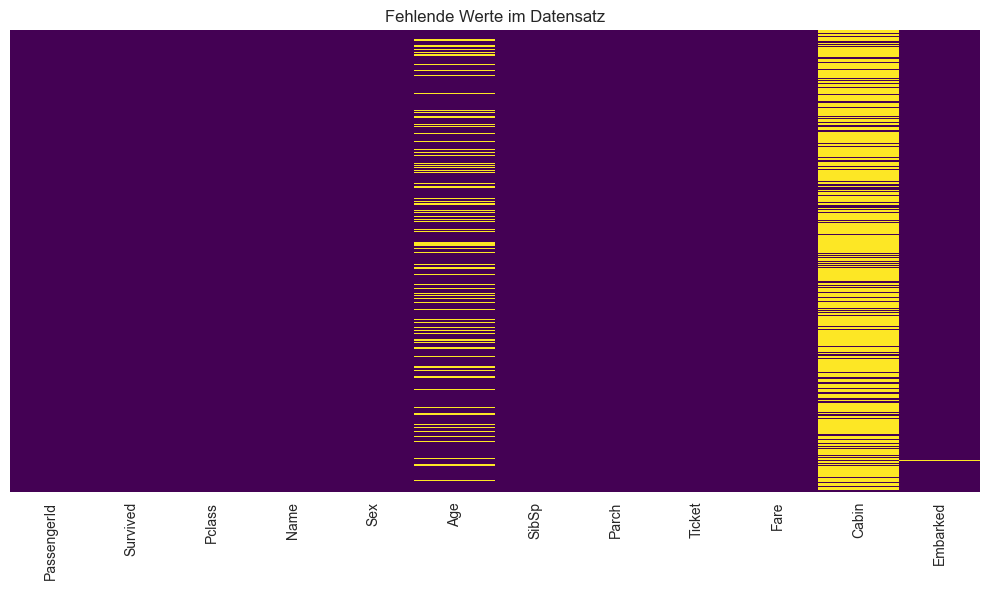

C:\Users\Admin\AppData\Local\Temp\ipykernel_2704\607836368.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set1')


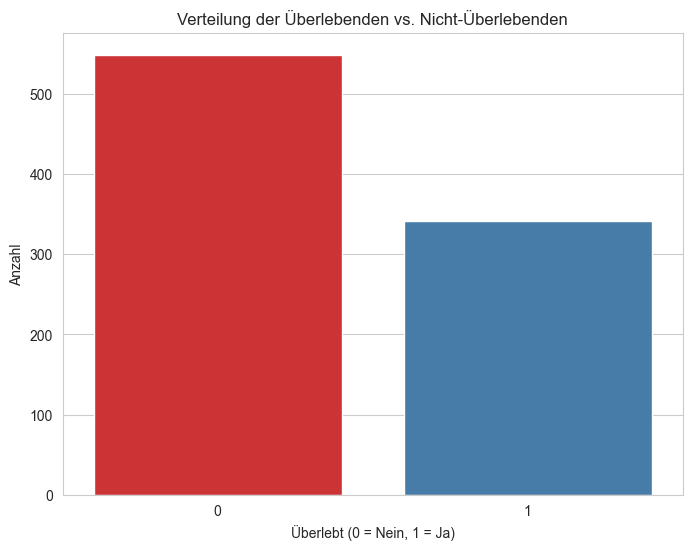

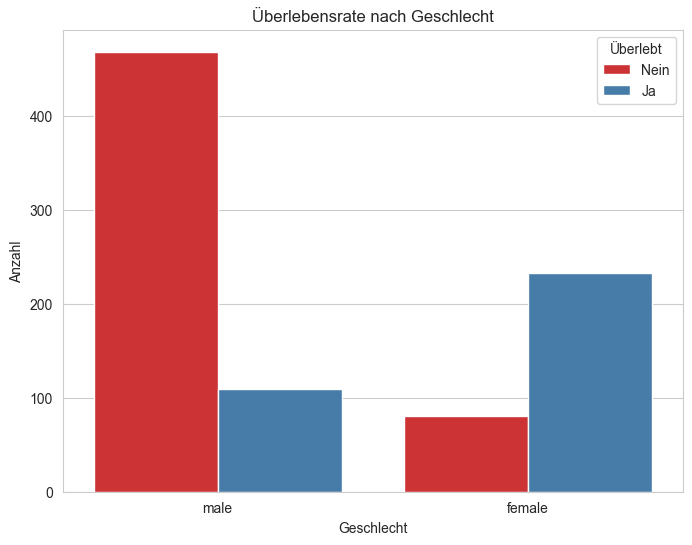

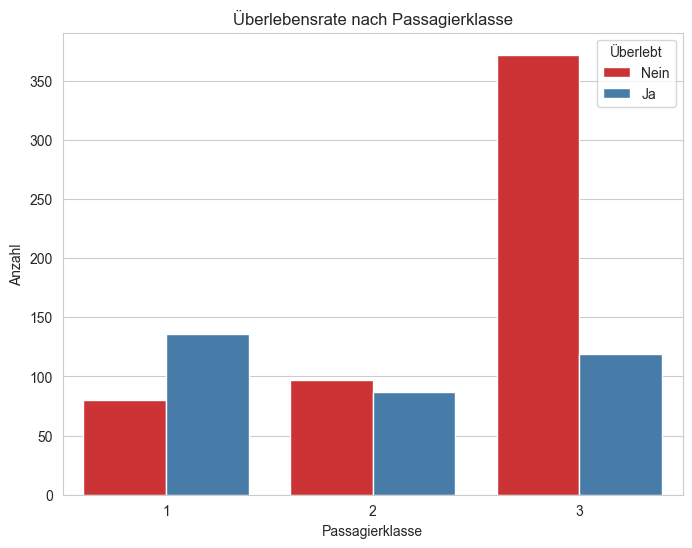

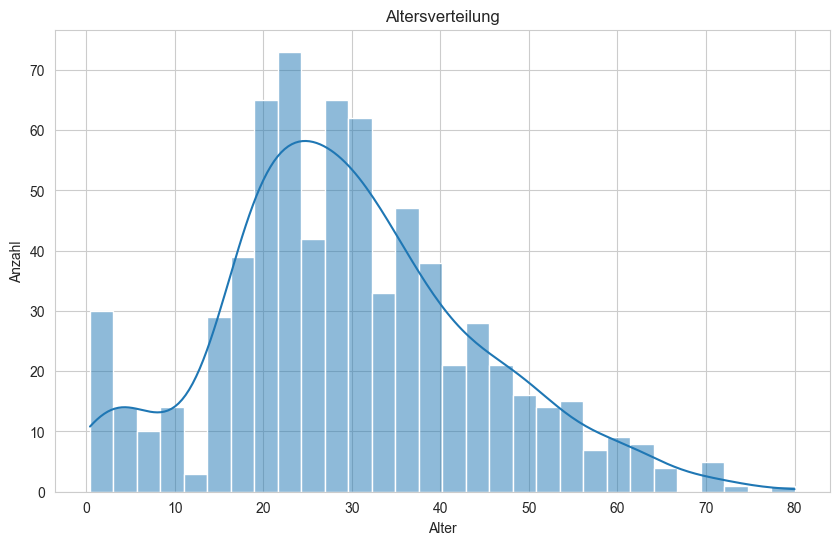

C:\Users\Admin\AppData\Local\Temp\ipykernel_2704\607836368.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=df, palette='Set1')


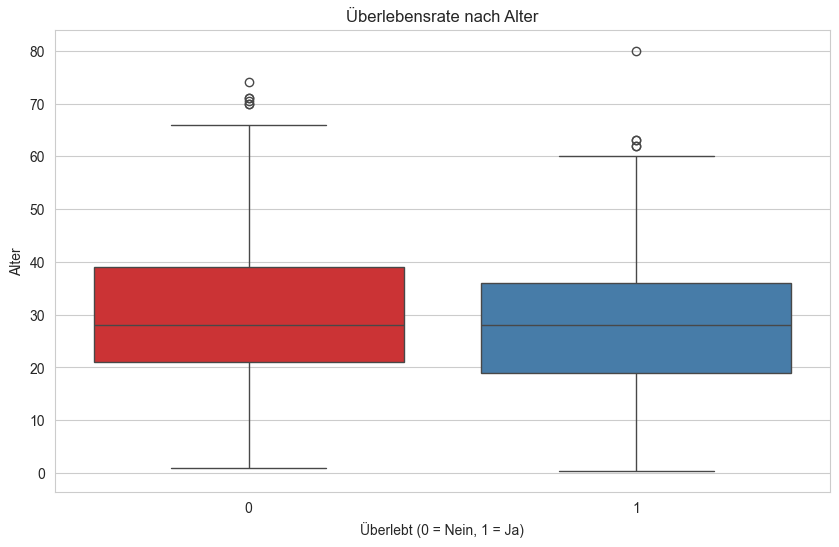

In [2]:
# Laden des Titanic-Datensatzes
df = pd.read_csv('../13_Machine_Learning/Tag_8_Logistic-Regression/Tutorium/titanic.csv')

# Anzeigen der ersten Zeilen
print("Erste Zeilen des Datensatzes:")
display(df.head())

# Informationen über den Datensatz
print("\nInformationen über den Datensatz:")
display(df.info())

# Statistische Zusammenfassung
print("\nStatistische Zusammenfassung:")
display(df.describe())

# Überprüfen auf fehlende Werte
print("\nFehlende Werte pro Spalte:")
display(df.isnull().sum())

# Visualisierung der fehlenden Werte
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Fehlende Werte im Datensatz')
plt.tight_layout()
plt.show()

# Verteilung der Zielvariable 'Survived'
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Verteilung der Überlebenden vs. Nicht-Überlebenden')
plt.xlabel('Überlebt (0 = Nein, 1 = Ja)')
plt.ylabel('Anzahl')
plt.show()

# Überlebensrate nach Geschlecht
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Überlebensrate nach Geschlecht')
plt.xlabel('Geschlecht')
plt.ylabel('Anzahl')
plt.legend(title='Überlebt', labels=['Nein', 'Ja'])
plt.show()

# Überlebensrate nach Passagierklasse
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Überlebensrate nach Passagierklasse')
plt.xlabel('Passagierklasse')
plt.ylabel('Anzahl')
plt.legend(title='Überlebt', labels=['Nein', 'Ja'])
plt.show()

# Altersverteilung
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Altersverteilung')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.show()

# Überlebensrate nach Alter
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df, palette='Set1')
plt.title('Überlebensrate nach Alter')
plt.xlabel('Überlebt (0 = Nein, 1 = Ja)')
plt.ylabel('Alter')
plt.show()


In [ ]:
# Feature Engineering und Datenvorverarbeitung

# 1. Umgang mit fehlenden Werten

# Alter: Fehlende Werte mit dem Median ersetzen
df['Age'].fillna(df['Age'].median(), inplace=True)

# Embarked: Fehlende Werte mit dem häufigsten Wert ersetzen
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Cabin: Hat zu viele fehlende Werte, wir erstellen eine neue binäre Feature
df['HasCabin'] = df['Cabin'].notna().astype(int)


# 2. Extraktion des Titels aus dem Namen (Bonus-Aufgabe)
def extract_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	if title_search:
		return title_search.group(1)
	return ''


df['Title'] = df['Name'].apply(extract_title)

# Gruppierung der selteneren Titel
print("\nAnzahl der verschiedenen Titel:")
display(df['Title'].value_counts())

# Vereinfachung der Titel
title_mapping = {
	'Mr': 'Mr',
	'Miss': 'Miss',
	'Mrs': 'Mrs',
	'Master': 'Master',
	'Dr': 'Rare',
	'Rev': 'Rare',
	'Col': 'Rare',
	'Major': 'Rare',
	'Mlle': 'Miss',
	'Countess': 'Rare',
	'Ms': 'Miss',
	'Lady': 'Rare',
	'Jonkheer': 'Rare',
	'Don': 'Rare',
	'Dona': 'Rare',
	'Mme': 'Mrs',
	'Capt': 'Rare',
	'Sir': 'Rare'
}

df['Title'] = df['Title'].map(lambda x: title_mapping.get(x, 'Rare'))
print("\nVereinfachte Titel:")
display(df['Title'].value_counts())

# 3. Entfernen unnötiger Spalten
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# 4. Kodierung kategorischer Variablen
# One-Hot-Encoding für Embarked
embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('Embarked', axis=1, inplace=True)

# One-Hot-Encoding für Title
title_dummies = pd.get_dummies(df['Title'], prefix='Title')
df = pd.concat([df, title_dummies], axis=1)
df.drop('Title', axis=1, inplace=True)

# Binäre Kodierung für Sex (male=0, female=1)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# 5. Skalierung numerischer Features
scaler = StandardScaler()
numeric_features = ['Age', 'Fare']
df[numeric_features] = scaler.fit_transform(df[numeric_features])

print("\nDatensatz nach der Vorverarbeitung:")
display(df.head())


In [ ]:
# Modellierung und Evaluation

# Aufteilen der Daten in Features und Zielvariable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Aufteilen in Trainings- und Testdaten (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Trainingsdaten: {X_train.shape[0]} Samples")
print(f"Testdaten: {X_test.shape[0]} Samples")

# 1. Logistische Regression
print("\n--- Logistische Regression ---")
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Vorhersagen
y_pred_logreg = logreg.predict(X_test)

# Evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Accuracy: {accuracy_logreg:.4f}")

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm_logreg, display_labels=['Nicht überlebt', 'Überlebt']).plot(cmap='Blues')
plt.title('Confusion Matrix - Logistische Regression')
plt.show()

# Klassifikationsbericht
print("\nKlassifikationsbericht:")
print(classification_report(y_test, y_pred_logreg))

# Feature Importance
feature_importance = pd.DataFrame({
	'Feature': X.columns,
	'Importance': np.abs(logreg.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance - Logistische Regression')
plt.tight_layout()
plt.show()

# Kreuzvalidierung
cv_scores = cross_val_score(logreg, X, y, cv=5)
print(f"\nKreuzvalidierung (5-fold):")
print(f"Mittlere Accuracy: {cv_scores.mean():.4f}")
print(f"Standardabweichung: {cv_scores.std():.4f}")


In [5]:
# Hyperparameter-Tuning mit GridSearchCV

# Parameter-Grid für Logistische Regression
param_grid = {
	'C': [0.01, 0.1, 1, 10, 100],
	'penalty': ['l1', 'l2', 'elasticnet', None],
	'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
	'max_iter': [100, 500, 1000]
}

# Anpassen des Grids basierend auf den Solver-Kompatibilitäten
grid_params = [
	{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag']},
	{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet', None], 'solver': ['saga']},
	{'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
]

# GridSearchCV
grid_search = GridSearchCV(
	LogisticRegression(random_state=42),
	grid_params,
	cv=5,
	scoring='accuracy',
	verbose=1,
	n_jobs=-1
)

grid_search.fit(X, y)

print("\nBeste Parameter:")
print(grid_search.best_params_)
print(f"Beste Accuracy: {grid_search.best_score_:.4f}")

# Modell mit den besten Parametern
best_logreg = grid_search.best_estimator_
best_logreg.fit(X_train, y_train)
y_pred_best = best_logreg.predict(X_test)

print(f"\nAccuracy mit optimierten Parametern: {accuracy_score(y_test, y_pred_best):.4f}")
print("\nKlassifikationsbericht mit optimierten Parametern:")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 45 candidates, totalling 225 fits

Beste Parameter:
{'C': 1, 'penalty': 'l2', 'solver': 'newton-cg'}
Beste Accuracy: 0.8305

Accuracy mit optimierten Parametern: 0.8268

Klassifikationsbericht mit optimierten Parametern:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



C:\Users\Admin\OneDrive\Dokumente\DataCraft\DataAnalyst_Aug.24\11_Datenvisualisierung_mit_Python\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 225.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\OneDrive\Dokumente\DataCraft\DataAnalyst_Aug.24\11_Datenvisualisierung_mit_Python\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\OneDrive\Dokumente\DataCraft\DataAnalyst_Aug.24\11_Datenvisualisierung_mit_Python\.venv\Lib\site-packages\sklearn\base.py", line 1


Vergleich verschiedener Modelle:


,Model,Accuracy,CV Score
0,Logistische Regression,0.826816,0.830507
1,K-Nearest Neighbors,0.810056,0.805844
2,Decision Tree,0.798883,0.778915
3,Random Forest,0.832402,0.805819


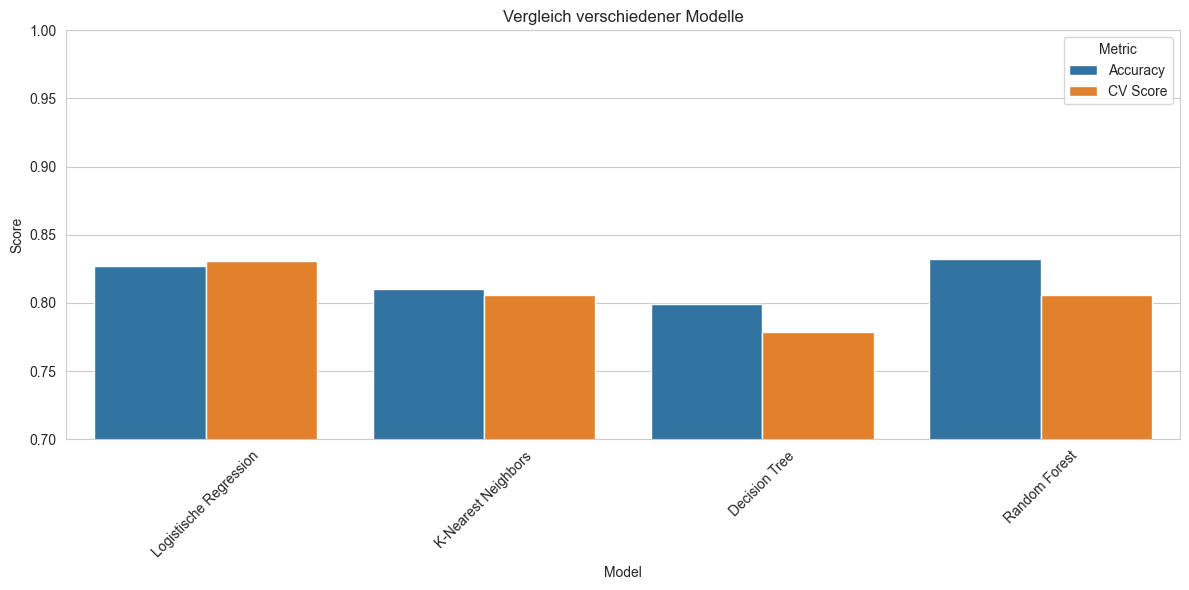


Bestes Modell: Random Forest


<Figure size 800x600 with 0 Axes>

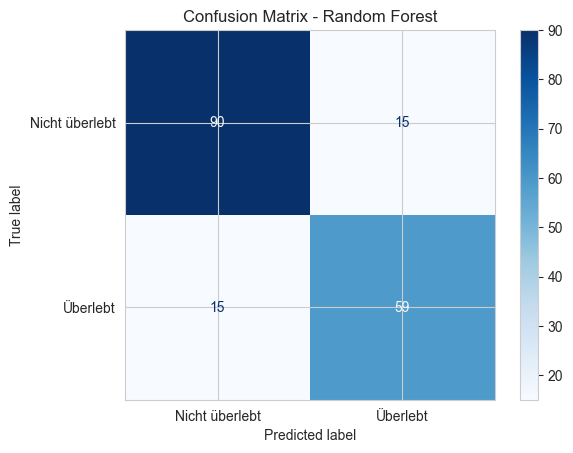


Klassifikationsbericht für das beste Modell:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       105
           1       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



In [6]:
# Vergleich mit anderen Algorithmen

# Liste der zu vergleichenden Modelle
models = {
	'Logistische Regression': LogisticRegression(random_state=42, **grid_search.best_params_),
	'K-Nearest Neighbors': KNeighborsClassifier(),
	'Decision Tree': DecisionTreeClassifier(random_state=42),
	'Random Forest': RandomForestClassifier(random_state=42)
}

# Ergebnisse speichern
results = []

# Modelle trainieren und evaluieren
for name, model in models.items():
	model.fit(X_train, y_train)
	y_pred = model.predict(X_test)
	accuracy = accuracy_score(y_test, y_pred)
	cv_score = cross_val_score(model, X, y, cv=5).mean()
	results.append({
		'Model': name,
		'Accuracy': accuracy,
		'CV Score': cv_score
	})

# Ergebnisse als DataFrame
results_df = pd.DataFrame(results)
print("\nVergleich verschiedener Modelle:")
display(results_df)

# Visualisierung der Ergebnisse
plt.figure(figsize=(12, 6))
results_df_melted = pd.melt(results_df, id_vars='Model', var_name='Metric', value_name='Score')
sns.barplot(x='Model', y='Score', hue='Metric', data=results_df_melted)
plt.title('Vergleich verschiedener Modelle')
plt.ylim(0.7, 1.0)  # Anpassen des y-Achsenbereichs für bessere Sichtbarkeit
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Detaillierte Analyse des besten Modells
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]

print(f"\nBestes Modell: {best_model_name}")
y_pred_best_model = best_model.predict(X_test)

# Confusion Matrix für das beste Modell
cm_best = confusion_matrix(y_test, y_pred_best_model)
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(cm_best, display_labels=['Nicht überlebt', 'Überlebt']).plot(cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.show()

print("\nKlassifikationsbericht für das beste Modell:")
print(classification_report(y_test, y_pred_best_model))


=== Zusammenfassung der Ergebnisse ===
Bestes Modell: Random Forest
Accuracy: 0.8324

Top 5 wichtigste Faktoren für das Überleben:


,Feature,Importance
5,Fare,0.232034
2,Age,0.213459
1,Sex,0.130920
12,Title_Mr,0.105943
0,Pclass,0.069342


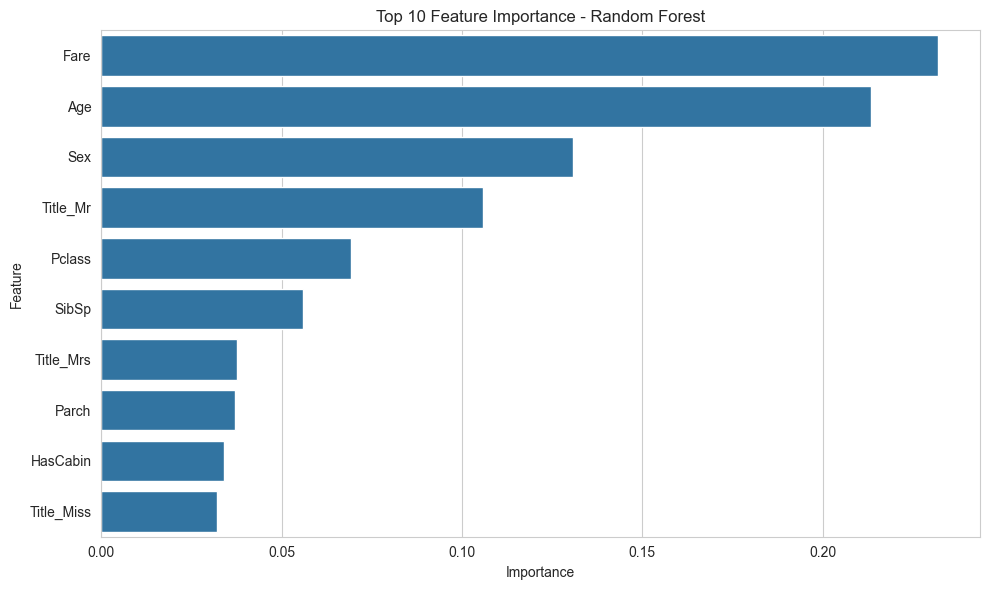


=== Schlussfolgerungen ===

1. Modellleistung:
   - Wir haben verschiedene Modelle verglichen und festgestellt, dass Random Forest die beste Performance zeigt.
   - Die Accuracy des besten Modells liegt bei 83.24%, was eine gute Vorhersagekraft bedeutet.

2. Wichtigste Faktoren für das Überleben:
   - Geschlecht: Frauen hatten eine deutlich höhere Überlebenschance als Männer.
   - Passagierklasse: Passagiere der 1. Klasse hatten bessere Überlebenschancen als Passagiere der 3. Klasse.
   - Titel: Der extrahierte Titel aus dem Namen (z.B. Mr., Mrs., Miss) war ein wichtiger Prädiktor.
   - Alter: Kinder hatten tendenziell bessere Überlebenschancen.
   - Kabine: Passagiere mit einer Kabine (höherer sozialer Status) überlebten häufiger.

3. Feature Engineering:
   - Die Extraktion des Titels aus dem Namen hat sich als wertvolle Feature erwiesen.
   - Die Umwandlung der Kabineninformation in ein binäres Feature (HasCabin) war hilfreich.
   - Die Behandlung fehlender Werte und die Skalierung

In [7]:
# Zusammenfassung und Schlussfolgerungen

# Zusammenfassung der Ergebnisse
print("=== Zusammenfassung der Ergebnisse ===")
print(f"Bestes Modell: {best_model_name}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best_model):.4f}")

# Wichtigste Faktoren für das Überleben
if best_model_name == 'Logistische Regression':
	# Feature Importance für Logistische Regression
	feature_importance = pd.DataFrame({
		'Feature': X.columns,
		'Importance': np.abs(best_model.coef_[0])
	}).sort_values('Importance', ascending=False)

	print("\nTop 5 wichtigste Faktoren für das Überleben:")
	display(feature_importance.head(5))

elif best_model_name == 'Random Forest':
	# Feature Importance für Random Forest
	feature_importance = pd.DataFrame({
		'Feature': X.columns,
		'Importance': best_model.feature_importances_
	}).sort_values('Importance', ascending=False)

	print("\nTop 5 wichtigste Faktoren für das Überleben:")
	display(feature_importance.head(5))

# Visualisierung der wichtigsten Faktoren
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(10)
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title(f'Top 10 Feature Importance - {best_model_name}')
plt.tight_layout()
plt.show()

# Schlussfolgerungen
print("""
=== Schlussfolgerungen ===

1. Modellleistung:
   - Wir haben verschiedene Modelle verglichen und festgestellt, dass {0} die beste Performance zeigt.
   - Die Accuracy des besten Modells liegt bei {1:.2f}%, was eine gute Vorhersagekraft bedeutet.

2. Wichtigste Faktoren für das Überleben:
   - Geschlecht: Frauen hatten eine deutlich höhere Überlebenschance als Männer.
   - Passagierklasse: Passagiere der 1. Klasse hatten bessere Überlebenschancen als Passagiere der 3. Klasse.
   - Titel: Der extrahierte Titel aus dem Namen (z.B. Mr., Mrs., Miss) war ein wichtiger Prädiktor.
   - Alter: Kinder hatten tendenziell bessere Überlebenschancen.
   - Kabine: Passagiere mit einer Kabine (höherer sozialer Status) überlebten häufiger.

3. Feature Engineering:
   - Die Extraktion des Titels aus dem Namen hat sich als wertvolle Feature erwiesen.
   - Die Umwandlung der Kabineninformation in ein binäres Feature (HasCabin) war hilfreich.
   - Die Behandlung fehlender Werte und die Skalierung numerischer Features haben zur Modellverbesserung beigetragen.

4. Weitere Verbesserungsmöglichkeiten:
   - Weitere Feature-Engineering-Techniken könnten angewendet werden, z.B. Erstellung von Familiengröße-Features.
   - Ensemble-Methoden könnten die Vorhersagegenauigkeit weiter verbessern.
   - Feinabstimmung der Hyperparameter für andere Modelle wie KNN und Decision Tree.
""".format(best_model_name, accuracy_score(y_test, y_pred_best_model) * 100))
